In [21]:
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [22]:
dataset=pd.read_csv("dataset.csv",sep=";")

In [23]:
dataset.drop(["node"],inplace=True,axis=1)

In [24]:
dataset["date"]=pd.to_datetime(dataset["date"],format="%Y-%m-%d %H:%M:%S")

In [25]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2242968 entries, 0 to 2242967
Data columns (total 3 columns):
 #   Column       Dtype         
---  ------       -----         
 0   consumption  float64       
 1   substation   object        
 2   date         datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 51.3+ MB


In [26]:
dataset.head()

,consumption,substation,date
0,-2.762882,AJAHUEL,2017-04-01
1,-119.559726,BUIN,2017-04-01
2,64.807776,BUIN,2017-04-01
3,-4.348032,LOSALME,2017-04-01
4,69.637895,LOSALME,2017-04-01


In [27]:
train=dataset.query("date.dt.year>2017 and date.dt.year <2022")

In [28]:
test=dataset.query("date.dt.year==2022")

In [29]:
serie_test=test.groupby(["substation","date"]).agg("sum")
serie_test.to_csv("test.csv")

In [30]:
serie_train=train.groupby(["substation","date"]).agg("sum")
serie_train.to_csv("train.csv")

In [31]:
ds_train=pd.read_csv("train.csv")
ds_train["date"]=pd.to_datetime(ds_train["date"],format="%Y-%m-%d %H:%M:%S")
ds_train=ds_train.set_index("date")
ds_train.head(-5)

,substation,consumption
date,,
2018-01-01 00:00:00,AJAHUEL,137.330840
2018-01-01 01:00:00,AJAHUEL,124.045549
2018-01-01 02:00:00,AJAHUEL,118.137811
2018-01-01 03:00:00,AJAHUEL,107.899499
2018-01-01 04:00:00,AJAHUEL,100.362069
...,...,...
2021-12-31 14:00:00,LOSALME,173.281029
2021-12-31 15:00:00,LOSALME,170.696485
2021-12-31 16:00:00,LOSALME,170.537953


In [32]:
ds_test=pd.read_csv("test.csv")
ds_test["date"]=pd.to_datetime(ds_test["date"],format="%Y-%m-%d %H:%M:%S")
ds_test=ds_test.set_index("date")
ds_test.head(-5)

,substation,consumption
date,,
2022-01-01 00:00:00,AJAHUEL,102.093131
2022-01-01 01:00:00,AJAHUEL,82.379086
2022-01-01 02:00:00,AJAHUEL,75.126780
2022-01-01 03:00:00,AJAHUEL,69.140084
2022-01-01 04:00:00,AJAHUEL,66.442176
...,...,...
2022-12-31 14:00:00,LOSALME,126.068562
2022-12-31 15:00:00,LOSALME,123.914380
2022-12-31 16:00:00,LOSALME,120.936187


In [33]:
subestaciones=["AJAHUEL","BUIN","CHENA","CNAVIA","ELSALTO","FLORIDA","LOSALME"]

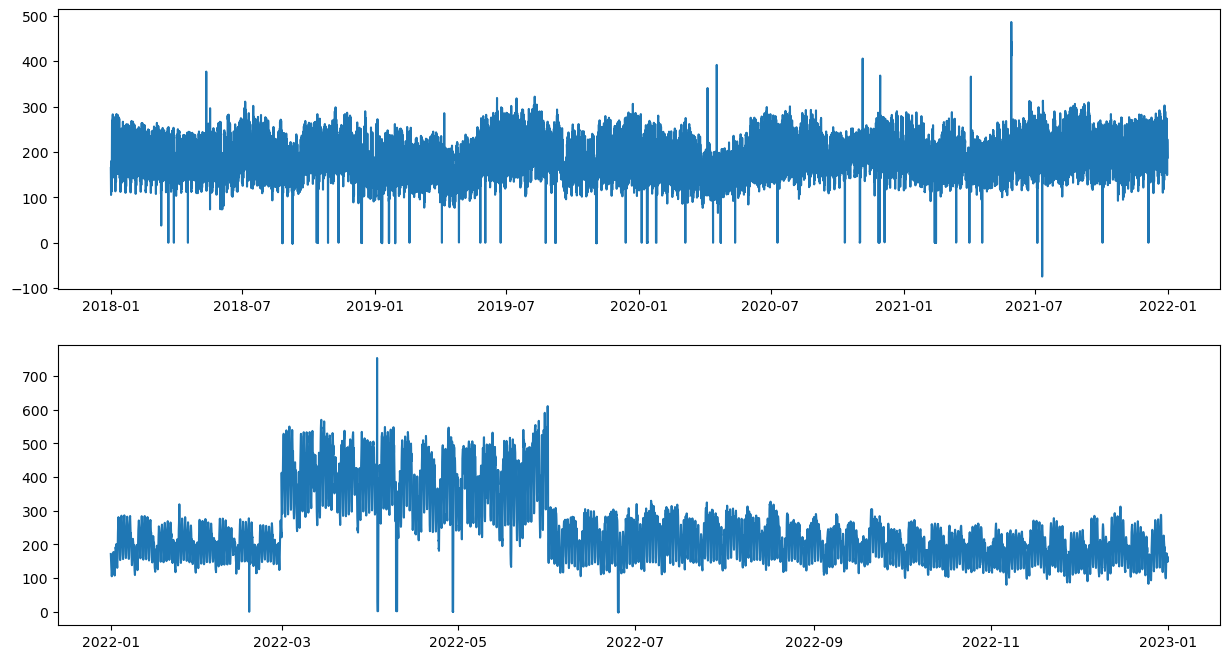

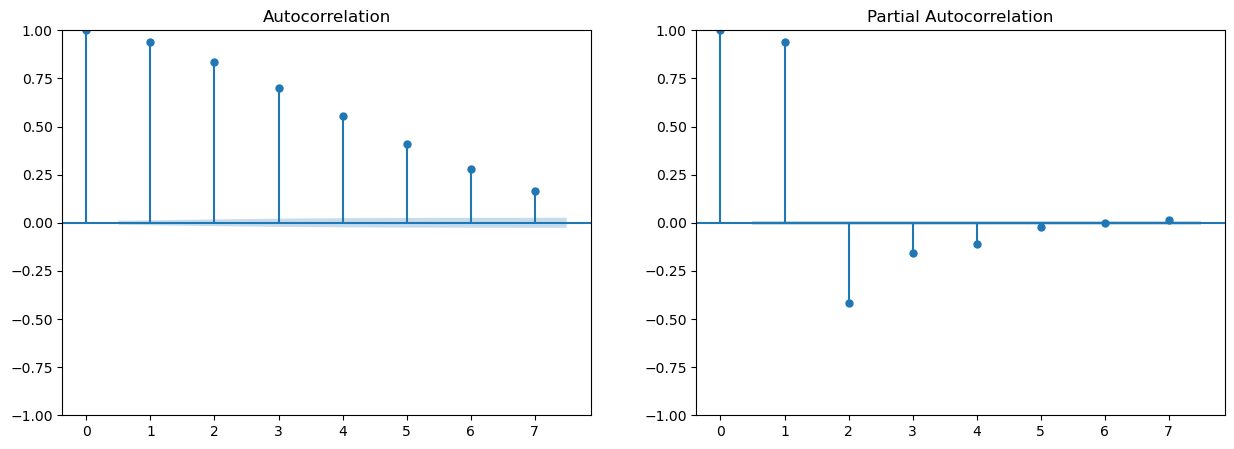

In [34]:
#Analisis estadistico de CHENA
subestacion="CHENA"
filtro="substation=='{0}'".format(subestacion)
y=ds_train.query(filtro)["consumption"]
x=ds_train.query(filtro).index
yt=ds_test.query(filtro)["consumption"]
xt=ds_test.query(filtro).index
fig, axes = plt.subplots(2,1)
fig.set_size_inches(15, 8)
axes[0].plot(x,y);
axes[1].plot(xt,yt);
fig, axes = plt.subplots(1,2)
fig.set_size_inches(15, 5)
plot_acf(y,lags=7,ax=axes[0]);
plot_pacf(y,lags=7,method="ywm",ax=axes[1]);

<Axes: xlabel='hour', ylabel='consumption'>

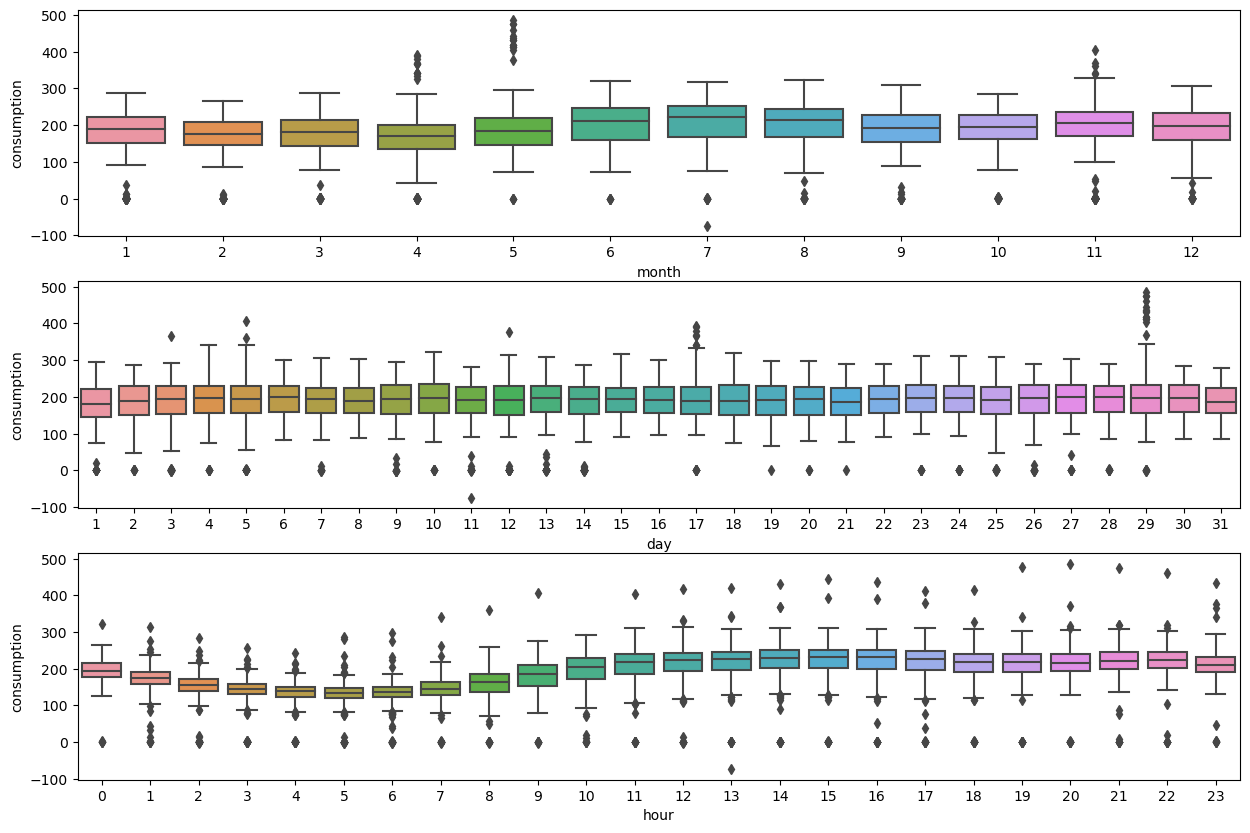

In [35]:
import seaborn as sns

data=pd.DataFrame()
data["consumption"]=y
data["date"]=y.index
data["day"]=data["date"].dt.day
data["hour"]=data["date"].dt.hour
data["month"]=data["date"].dt.month

fig, axes = plt.subplots(3,1)
fig.set_size_inches(15, 10)

sns.boxplot(x="month", y="consumption",data=data,ax=axes[0])
sns.boxplot(x="day", y="consumption",data=data,ax=axes[1])
sns.boxplot(x="hour", y="consumption",data=data,ax=axes[2])

In [36]:
data["year"]=data["date"].dt.year
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 34913 entries, 2018-01-01 00:00:00 to 2021-12-31 23:00:00
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   consumption  34913 non-null  float64       
 1   date         34913 non-null  datetime64[ns]
 2   day          34913 non-null  int64         
 3   hour         34913 non-null  int64         
 4   month        34913 non-null  int64         
 5   year         34913 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(4)
memory usage: 1.9 MB


In [37]:
data.sample(20)

,consumption,date,day,hour,month,year
date,,,,,,
2020-09-28 19:00:00,200.445395,2020-09-28 19:00:00,28,19,9,2020
2021-03-13 17:00:00,207.447978,2021-03-13 17:00:00,13,17,3,2021
2021-11-29 09:00:00,209.400672,2021-11-29 09:00:00,29,9,11,2021
2019-04-16 15:00:00,207.318349,2019-04-16 15:00:00,16,15,4,2019
2020-10-30 09:00:00,201.065505,2020-10-30 09:00:00,30,9,10,2020
2021-10-30 02:00:00,161.085626,2021-10-30 02:00:00,30,2,10,2021
2020-10-16 21:00:00,204.139562,2020-10-16 21:00:00,16,21,10,2020
2021-05-25 16:00:00,215.620837,2021-05-25 16:00:00,25,16,5,2021
2020-12-07 19:00:00,210.315479,2020-12-07 19:00:00,7,19,12,2020


In [38]:
data_chena=data[["year","month","day","consumption"]].groupby(["year","month","day"]).agg("mean")
data_chena.to_csv("data_ys_chena.csv")

In [40]:
from datetime import datetime
ys=[]
xs=[]
archivo=open("data_ys_chena.csv")
archivo.readline()
for linea in archivo:
    linea=linea.strip().split(",")
    ys.append(float(linea[3]))
    fecha=str(linea[0])+"-"+str(linea[1]).zfill(2)+"-"+str(linea[2]).zfill(2)
    xs.append(datetime.strptime(fecha,"%Y-%m-%d"))

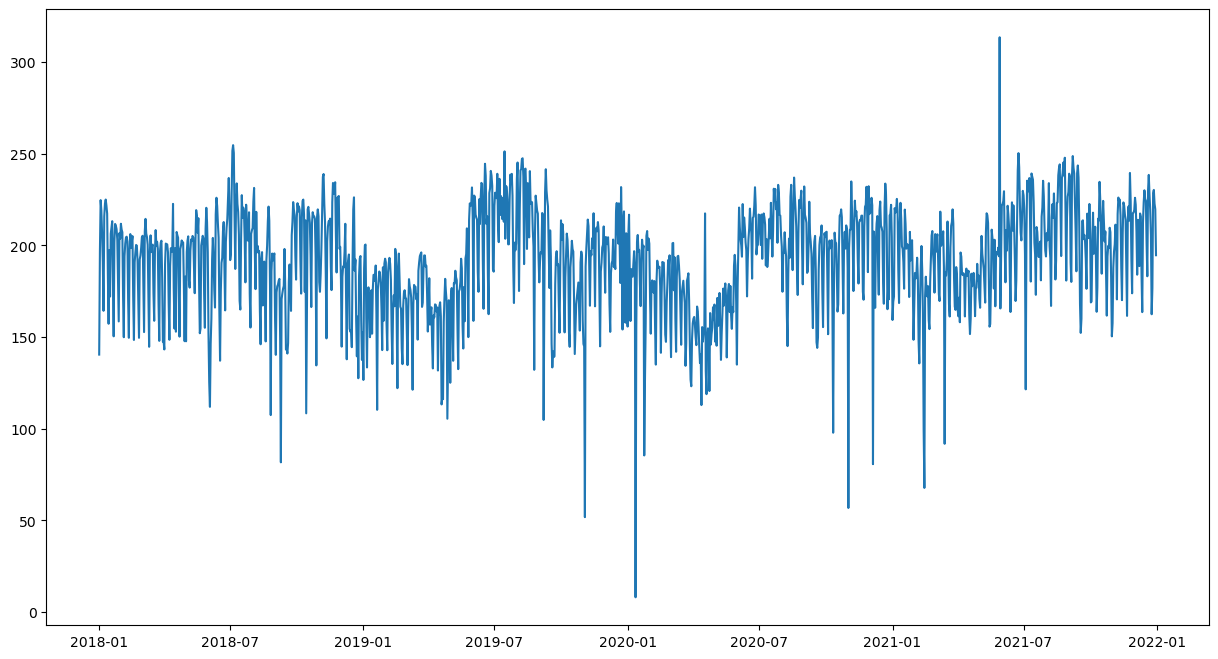

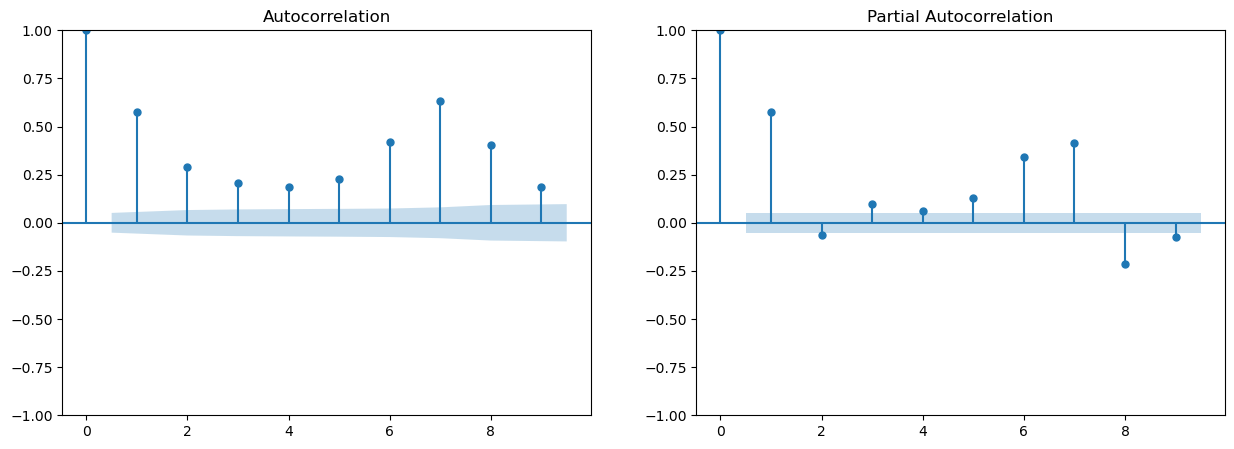

In [20]:
fig, axes = plt.subplots(1,1)
fig.set_size_inches(15, 8)
axes.plot(xs,ys);
fig, axes = plt.subplots(1,2)
fig.set_size_inches(15, 5)
plot_acf(ys,lags=9,ax=axes[0]);
plot_pacf(ys,lags=9,method="ywm",ax=axes[1]);

In [21]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(ys)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
# p value < 0,05, la serie es estacionaria.

ADF Statistic: -3.959352
p-value: 0.001639
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568


In [22]:
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error
import numpy as np

In [23]:
# Encontrar el mejor modelo ARIMA
modelo_auto = auto_arima(ys, seasonal=False, trace=True)

# Obtener los términos óptimos del modelo ARIMA
best_order = modelo_auto.get_params()['order']

# Ajustar el modelo ARIMA con los términos óptimos
modelo_buin_arima = ARIMA(ys, order=best_order)
m_ad1 = modelo_buin_arima.fit()

# Calcular el error cuadrático medio
mse = m_ad1.mse

# Calcular el criterio de información de Akaike (AIC)
aic = m_ad1.aic

# Realizar predicciones
ysp = m_ad1.predict()

# Calcular el error porcentual absoluto medio (MAPE)
mape = mean_absolute_percentage_error(ys, ysp)

# Imprimir las métricas de evaluación
print("MSE:", mse)
print("AIC:", aic)
print("MAPE:", mape)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=13196.332, Time=1.70 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=13717.385, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=13681.933, Time=0.24 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=13498.185, Time=0.23 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=13715.388, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=13249.175, Time=0.59 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=13229.022, Time=0.60 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=13228.304, Time=1.43 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=13011.585, Time=2.40 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=13248.690, Time=0.93 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=13089.176, Time=2.76 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=3.14 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=13220.518, Time=1.11 sec
 ARIMA(3,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=3.22 sec
 ARIMA(2,1,3)(0,0,0)[0]        

C:\Users\Pc-ADS\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [24]:
modelo_chena=ARIMA(ys,order=(2,1,3)) #Parametros escojidos segun auto_arima
m_ad1=modelo_chena.fit()
print("MSE",m_ad1.mse)
print("AIC",m_ad1.aic)
ysp=m_ad1.predict()
mape=mean_absolute_percentage_error(ys,ysp)
print("MAPE",mape)

MSE 423.93602422557814
AIC 12943.402167619512
MAPE 0.09910900368020999


C:\Users\Pc-ADS\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [25]:
modelo_chena=ARIMA(ys,order=(3,0,3)) #Parametros escojidos segun lo visto en clases
m_ad1=modelo_chena.fit()
print("MSE",m_ad1.mse)
print("AIC",m_ad1.aic)
ysp=m_ad1.predict()
mape=mean_absolute_percentage_error(ys,ysp)
print("MAPE",mape)

MSE 401.85268004002063
AIC 12921.203317513262
MAPE 0.0969086585934163


C:\Users\Pc-ADS\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


El MAPE sugiere que el modelo tiene un buen rendimiento,  las predicciones estan bastante cerca de los valores reales en promedio

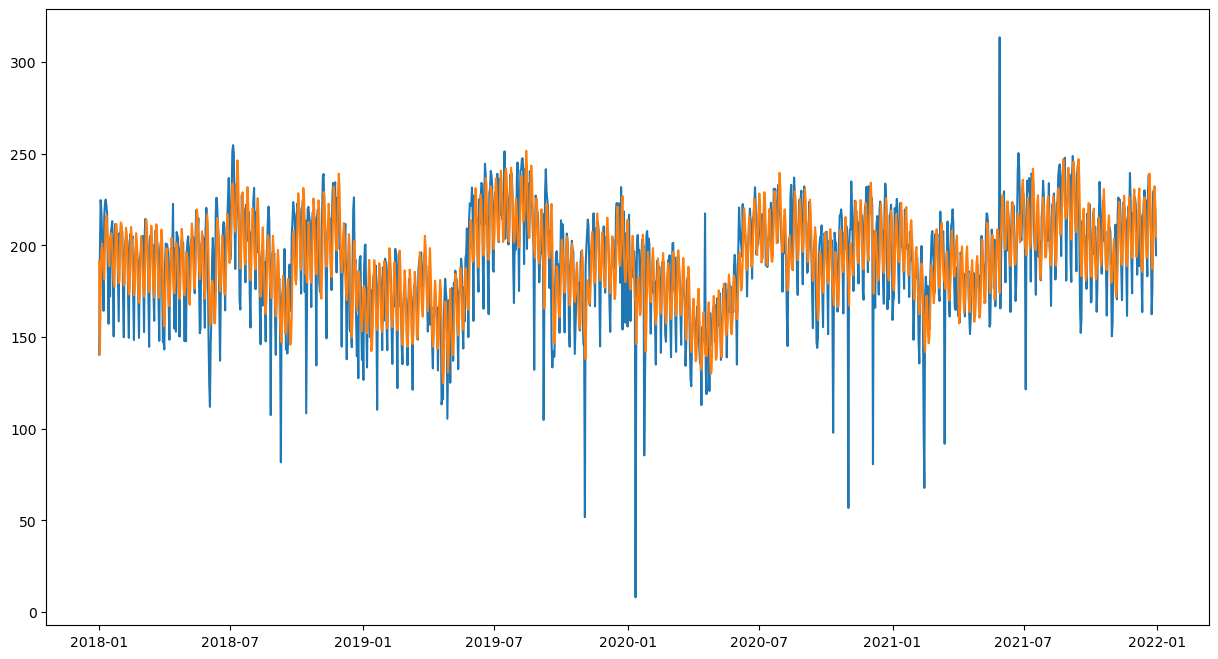

In [26]:
fig, axes = plt.subplots(1,1)
fig.set_size_inches(15, 8)
axes.plot(xs,ys,xs,ysp);

In [27]:
yw=[]
yt=[]
window=8
for i in range(0,len(ys)):
    if i+window < len(ys):
        row=[]
        for j in range(window):
            row.append(ys[i+j])
        yw.append(row)
        yt.append(ys[i+window])
    else:
        break
print(len(yw))

1453


In [28]:
yw=np.asarray(yw)
yt=np.asarray(yt)

In [29]:
import tensorflow as tf
from datetime import datetime
from tensorflow import keras
from keras.layers import SimpleRNN, Input, Dense
from keras.models import Sequential
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import random as rd

In [30]:
seed=16011996
rd.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

In [31]:
model_chena = Sequential()
model_chena.add(Input(name="serie",shape=(8,1)))
model_chena.add(SimpleRNN(256))
model_chena.add(Dense(128))
model_chena.add(Dense(1, activation='linear'))
model_chena.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 256)               66048     
                                                                 
 dense (Dense)               (None, 128)               32896     
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 99073 (387.00 KB)
Trainable params: 99073 (387.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [32]:
tag="rnn_chena"+datetime.now().strftime("%Y%m%d-%H%M%S")
log_dir = 'logs\\fit\\' + tag
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
optimizer=Adam(learning_rate=1e-3)

model_chena.compile(optimizer="Adam", loss='mse', metrics=['mse','mae','mape'])
rnn = model_chena.fit(yw, yt, batch_size=256, epochs=200,verbose=1,callbacks=[tensorboard_callback])
model_chena.save(log_dir+'\\model_chena_{0}.keras'.format(tag))



Epoch 1/200


6/6 [==============================] - 2s 40ms/step - loss: 33267.7070 - mse: 33267.7070 - mae: 179.9583 - mape: 93.7795
Epoch 2/200
6/6 [==============================] - 0s 22ms/step - loss: 25155.7227 - mse: 25155.7227 - mae: 155.9206 - mape: 81.1908
Epoch 3/200
6/6 [==============================] - 0s 22ms/step - loss: 17960.6680 - mse: 17960.6680 - mae: 130.7443 - mape: 67.8452
Epoch 4/200
6/6 [==============================] - 0s 21ms/step - loss: 11625.0293 - mse: 11625.0293 - mae: 103.8324 - mape: 53.7831
Epoch 5/200
6/6 [==============================] - 0s 23ms/step - loss: 6586.2734 - mse: 6586.2734 - mae: 76.0973 - mape: 39.4603
Epoch 6/200
6/6 [==============================] - 0s 22ms/step - loss: 3141.4141 - mse: 3141.4141 - mae: 49.9601 - mape: 26.2355
Epoch 7/200
6/6 [==============================] - 0s 21ms/step - loss: 1359.4312 - mse: 1359.4312 - mae: 30.8680 - mape: 17.3025
Epoch 8/200
6/6 [==============================] - 0s 21ms/step - loss: 850

6/6 [==============================] - 0s 22ms/step - loss: 489.5439 - mse: 489.5439 - mae: 15.9853 - mape: 10.7253
Epoch 123/200
6/6 [==============================] - 0s 24ms/step - loss: 488.6016 - mse: 488.6016 - mae: 15.8729 - mape: 10.7442
Epoch 124/200
6/6 [==============================] - 0s 21ms/step - loss: 492.5808 - mse: 492.5808 - mae: 16.0487 - mape: 10.7077
Epoch 125/200
6/6 [==============================] - 0s 20ms/step - loss: 490.7555 - mse: 490.7555 - mae: 15.8717 - mape: 10.7432
Epoch 126/200
6/6 [==============================] - 0s 21ms/step - loss: 489.3274 - mse: 489.3274 - mae: 16.0882 - mape: 10.7924
Epoch 127/200
6/6 [==============================] - 0s 21ms/step - loss: 487.9946 - mse: 487.9946 - mae: 15.8297 - mape: 10.6631
Epoch 128/200
6/6 [==============================] - 0s 20ms/step - loss: 486.1174 - mse: 486.1174 - mae: 15.8182 - mape: 10.6684
Epoch 129/200
6/6 [==============================] - 0s 20ms/step - loss: 483.8155 - mse: 483.8155 - mae

#### Mejor rendimiento recurrente sin shuffle

batch 512

Epoch 198/200

3/3 [==============================] - 0s 43ms/step - loss: 249.3464 - mse: 249.3464 - mae: 10.5225 - mape: 7.3650

46/46 [==============================] - 0s 2ms/step


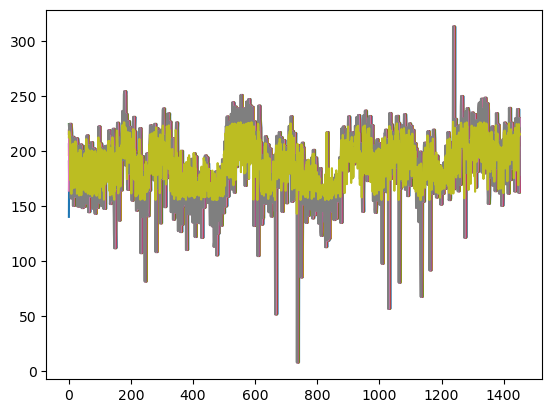

In [33]:
xw=[i for i in range(len(yw))]
yp=model_chena.predict(yw)
plt.plot(xw,yw,xw,yp)

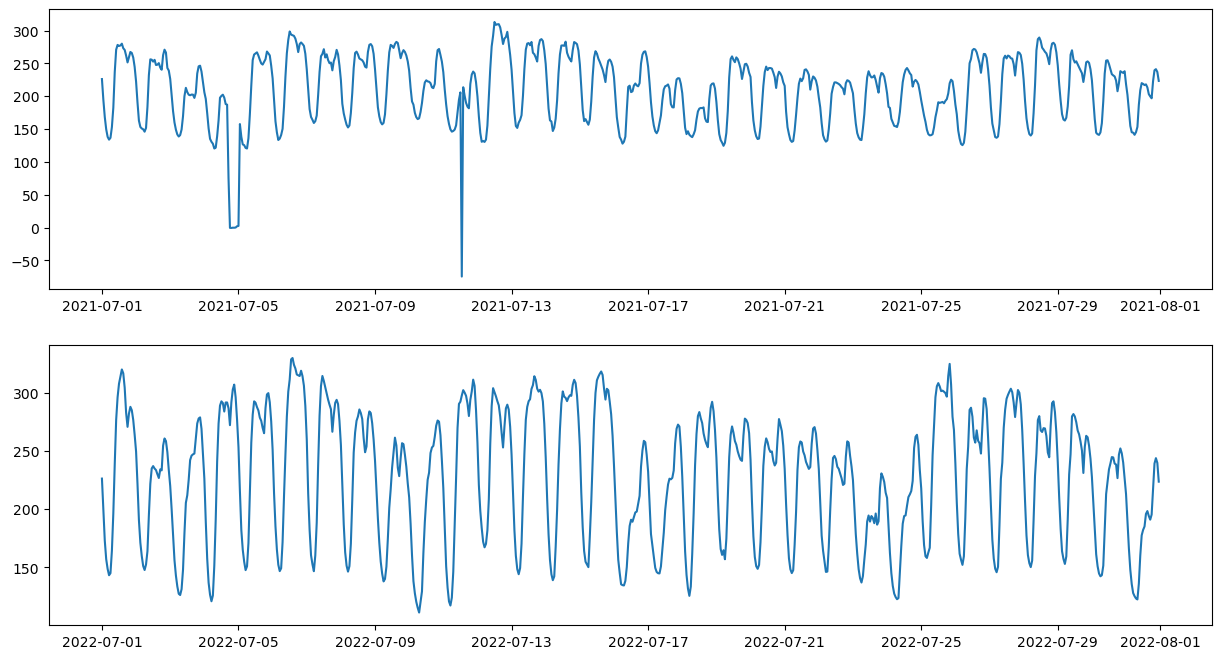

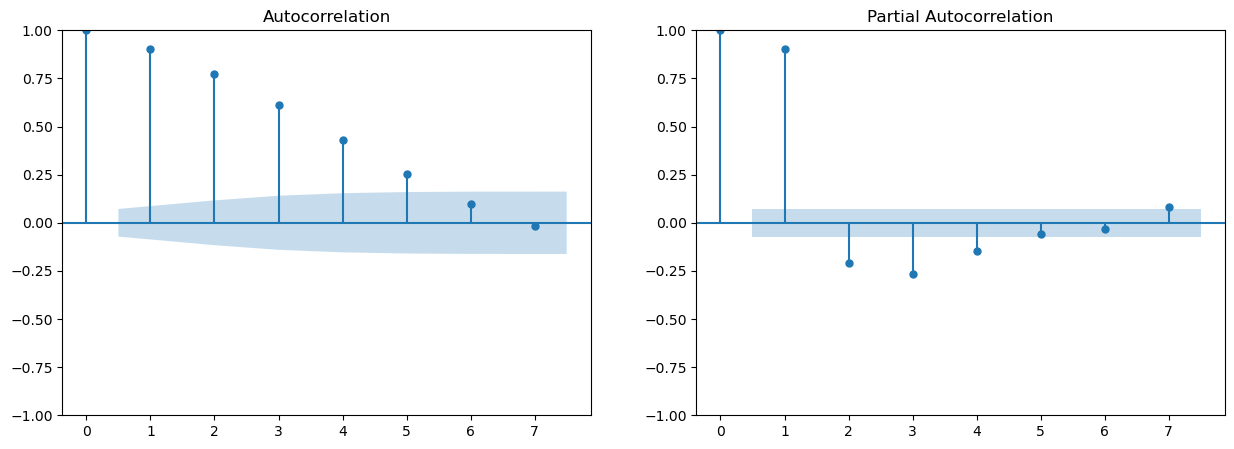

In [34]:
subestacion="CHENA"
filtro="substation=='{0}' and date.dt.year==2021 and date.dt.month==7".format(subestacion)
ym=ds_train.query(filtro)["consumption"]
xm=ds_train.query(filtro).index
filtro="substation=='{0}' and date.dt.year==2022 and date.dt.month==7".format(subestacion)
ytm=ds_test.query(filtro)["consumption"]
xtm=ds_test.query(filtro).index
fig, axes = plt.subplots(2,1)
fig.set_size_inches(15, 8)
axes[0].plot(xm,ym);
axes[1].plot(xtm,ytm);
fig, axes = plt.subplots(1,2)
fig.set_size_inches(15, 5)
plot_acf(ym,lags=7,ax=axes[0]);
plot_pacf(ym,lags=7,method="ywm",ax=axes[1]);

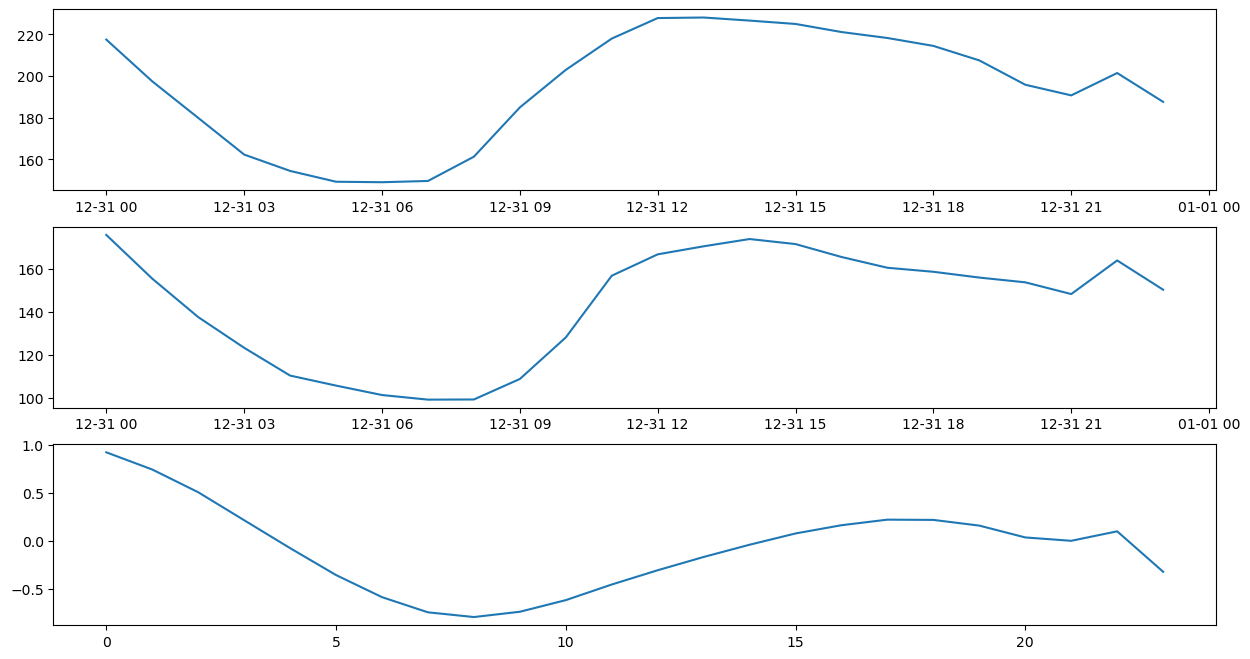

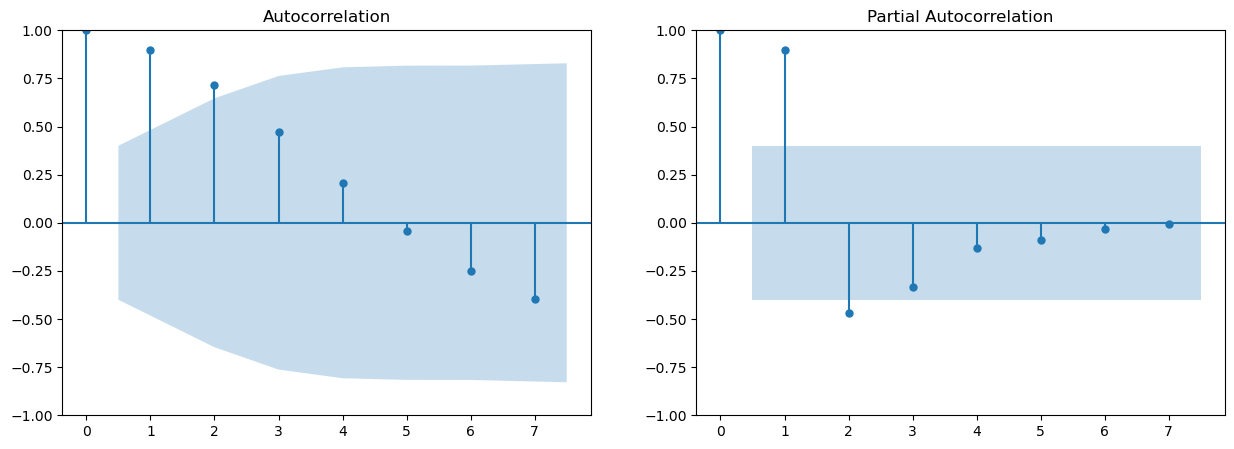

In [35]:
subestacion="CHENA"
filtro="substation=='{0}' and date.dt.year==2021 and date.dt.month==12 and date.dt.day==31".format(subestacion)
yd=ds_train.query(filtro)["consumption"]
xd=ds_train.query(filtro).index
filtro="substation=='{0}' and date.dt.year==2022 and date.dt.month==12 and date.dt.day==31".format(subestacion)
ytd=ds_test.query(filtro)["consumption"]
xtd=ds_test.query(filtro).index
c_yd_ytd=sm.tsa.stattools.ccf(yd, ytd);
fig, axes = plt.subplots(3,1)
fig.set_size_inches(15, 8)
axes[0].plot(xd,yd);
axes[1].plot(xtd,ytd);
axes[2].plot(c_yd_ytd);
fig, axes = plt.subplots(1,2)
fig.set_size_inches(15, 5)
plot_acf(yd,lags=7,ax=axes[0]);
plot_pacf(yd,lags=7,method="ywm",ax=axes[1]);

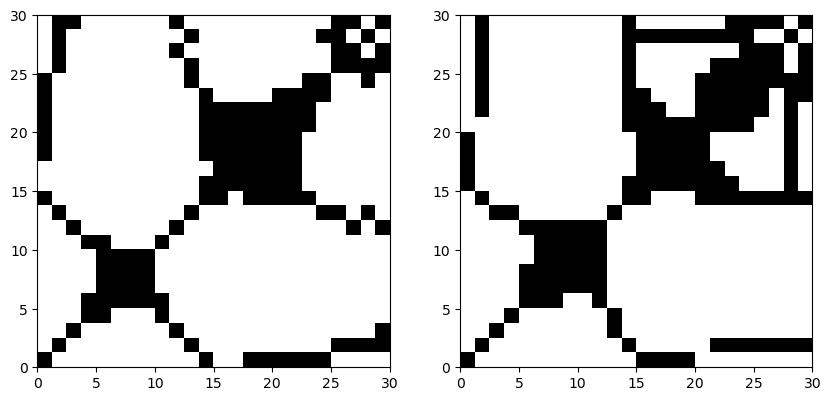

In [36]:
from pyts.image import RecurrencePlot

rp = RecurrencePlot(threshold=10)
y_rp = rp.transform(np.array([yd]))
yt_rp = rp.transform(np.array([ytd]))

fig, axes = plt.subplots(1,2)
fig.set_size_inches(10, 5)
axes[0].imshow(y_rp[0], cmap='binary', origin='lower',extent=[0, 30, 0, 30]);
axes[1].imshow(yt_rp[0], cmap='binary', origin='lower',extent=[0, 30, 0, 30]);

In [37]:
model_chena_shuffle = Sequential()
model_chena_shuffle.add(Input(name="serie",shape=(8,1)))
model_chena_shuffle.add(SimpleRNN(256))
model_chena_shuffle.add(Dense(128))
model_chena_shuffle.add(Dense(1, activation='linear'))
model_chena_shuffle.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 256)               66048     
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 99073 (387.00 KB)
Trainable params: 99073 (387.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [40]:
tag="rnn_chena_shuffle"+datetime.now().strftime("%Y%m%d-%H%M%S")
log_dir = "logs\\fit\\" + tag
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
optimizer=Adam(learning_rate=1e-3)

model_chena_shuffle.compile(optimizer="Adam", loss='mse', metrics=['mse','mae','mape'])
rnn = model_chena_shuffle.fit(yw, yt, batch_size=256, epochs=1000, shuffle=True ,verbose=1,callbacks=[tensorboard_callback])
model_chena_shuffle.save(log_dir+'\\model_chena_shuffle_{0}.keras'.format(tag))

Epoch 1/1000
6/6 [==============================] - 1s 22ms/step - loss: 375.0323 - mse: 375.0323 - mae: 13.9699 - mape: 9.3180
Epoch 2/1000
6/6 [==============================] - 0s 21ms/step - loss: 316.9978 - mse: 316.9978 - mae: 12.2370 - mape: 8.4395
Epoch 3/1000
6/6 [==============================] - 0s 21ms/step - loss: 294.3316 - mse: 294.3316 - mae: 11.4520 - mape: 7.7775
Epoch 4/1000
6/6 [==============================] - 0s 21ms/step - loss: 284.1587 - mse: 284.1587 - mae: 11.1008 - mape: 7.7726
Epoch 5/1000
6/6 [==============================] - 0s 21ms/step - loss: 277.1190 - mse: 277.1190 - mae: 11.0783 - mape: 7.6752
Epoch 6/1000
6/6 [==============================] - 0s 22ms/step - loss: 273.4944 - mse: 273.4944 - mae: 11.0533 - mape: 7.6160
Epoch 7/1000
6/6 [==============================] - 0s 21ms/step - loss: 272.2926 - mse: 272.2926 - mae: 10.9507 - mape: 7.5976
Epoch 8/1000
6/6 [==============================] - 0s 21ms/step - loss: 271.9266 - mse: 271.9266 - mae:

6/6 [==============================] - 0s 20ms/step - loss: 245.5498 - mse: 245.5498 - mae: 10.5081 - mape: 7.1944
Epoch 128/1000
6/6 [==============================] - 0s 20ms/step - loss: 245.1756 - mse: 245.1756 - mae: 10.4009 - mape: 7.1821
Epoch 129/1000
6/6 [==============================] - 0s 20ms/step - loss: 246.1936 - mse: 246.1936 - mae: 10.4213 - mape: 7.2129
Epoch 130/1000
6/6 [==============================] - 0s 20ms/step - loss: 244.1025 - mse: 244.1025 - mae: 10.4168 - mape: 7.1882
Epoch 131/1000
6/6 [==============================] - 0s 20ms/step - loss: 248.7631 - mse: 248.7631 - mae: 10.4733 - mape: 7.2492
Epoch 132/1000
6/6 [==============================] - 0s 20ms/step - loss: 252.2574 - mse: 252.2574 - mae: 10.8466 - mape: 7.3452
Epoch 133/1000
6/6 [==============================] - 0s 21ms/step - loss: 248.2529 - mse: 248.2529 - mae: 10.5798 - mape: 7.2322
Epoch 134/1000
6/6 [==============================] - 0s 21ms/step - loss: 247.4315 - mse: 247.4315 - mae

6/6 [==============================] - 0s 21ms/step - loss: 226.9111 - mse: 226.9111 - mae: 10.1929 - mape: 6.9435
Epoch 254/1000
6/6 [==============================] - 0s 21ms/step - loss: 226.7588 - mse: 226.7588 - mae: 10.2308 - mape: 7.0076
Epoch 255/1000
6/6 [==============================] - 0s 21ms/step - loss: 221.0812 - mse: 221.0812 - mae: 9.9596 - mape: 6.9172
Epoch 256/1000
6/6 [==============================] - 0s 21ms/step - loss: 235.5338 - mse: 235.5338 - mae: 10.5406 - mape: 7.2008
Epoch 257/1000
6/6 [==============================] - 0s 21ms/step - loss: 226.2351 - mse: 226.2351 - mae: 10.1681 - mape: 7.0308
Epoch 258/1000
6/6 [==============================] - 0s 22ms/step - loss: 223.0640 - mse: 223.0640 - mae: 10.1343 - mape: 6.8906
Epoch 259/1000
6/6 [==============================] - 0s 21ms/step - loss: 226.2725 - mse: 226.2725 - mae: 10.2237 - mape: 6.9832
Epoch 260/1000
6/6 [==============================] - 0s 21ms/step - loss: 221.1256 - mse: 221.1256 - mae:

6/6 [==============================] - 0s 20ms/step - loss: 201.4749 - mse: 201.4749 - mae: 9.6984 - mape: 6.6270
Epoch 380/1000
6/6 [==============================] - 0s 22ms/step - loss: 199.3709 - mse: 199.3709 - mae: 9.5886 - mape: 6.4890
Epoch 381/1000
6/6 [==============================] - 0s 21ms/step - loss: 197.6067 - mse: 197.6067 - mae: 9.7267 - mape: 6.5745
Epoch 382/1000
6/6 [==============================] - 0s 21ms/step - loss: 202.0822 - mse: 202.0822 - mae: 9.8018 - mape: 6.6489
Epoch 383/1000
6/6 [==============================] - 0s 21ms/step - loss: 203.7330 - mse: 203.7330 - mae: 9.7772 - mape: 6.6108
Epoch 384/1000
6/6 [==============================] - 0s 21ms/step - loss: 197.7548 - mse: 197.7548 - mae: 9.5938 - mape: 6.5285
Epoch 385/1000
6/6 [==============================] - 0s 22ms/step - loss: 199.2233 - mse: 199.2233 - mae: 9.6020 - mape: 6.5559
Epoch 386/1000
6/6 [==============================] - 0s 21ms/step - loss: 198.9121 - mse: 198.9121 - mae: 9.480

6/6 [==============================] - 0s 21ms/step - loss: 193.3004 - mse: 193.3004 - mae: 9.7768 - mape: 6.4706
Epoch 506/1000
6/6 [==============================] - 0s 21ms/step - loss: 179.3143 - mse: 179.3143 - mae: 9.4702 - mape: 6.2666
Epoch 507/1000
6/6 [==============================] - 0s 26ms/step - loss: 177.1907 - mse: 177.1907 - mae: 9.2200 - mape: 6.1652
Epoch 508/1000
6/6 [==============================] - 0s 27ms/step - loss: 182.0748 - mse: 182.0748 - mae: 9.4258 - mape: 6.2420
Epoch 509/1000
6/6 [==============================] - 0s 22ms/step - loss: 181.5700 - mse: 181.5700 - mae: 9.5857 - mape: 6.2892
Epoch 510/1000
6/6 [==============================] - 0s 22ms/step - loss: 181.3167 - mse: 181.3167 - mae: 9.2888 - mape: 6.3417
Epoch 511/1000
6/6 [==============================] - 0s 22ms/step - loss: 174.5765 - mse: 174.5765 - mae: 9.2721 - mape: 6.1093
Epoch 512/1000
6/6 [==============================] - 0s 23ms/step - loss: 173.6951 - mse: 173.6951 - mae: 9.213

6/6 [==============================] - 0s 22ms/step - loss: 153.3150 - mse: 153.3150 - mae: 8.8831 - mape: 5.7680
Epoch 632/1000
6/6 [==============================] - 0s 23ms/step - loss: 153.7491 - mse: 153.7491 - mae: 8.8155 - mape: 5.6901
Epoch 633/1000
6/6 [==============================] - 0s 22ms/step - loss: 167.7944 - mse: 167.7944 - mae: 9.2198 - mape: 5.9775
Epoch 634/1000
6/6 [==============================] - 0s 21ms/step - loss: 154.2760 - mse: 154.2760 - mae: 8.8791 - mape: 5.7278
Epoch 635/1000
6/6 [==============================] - 0s 22ms/step - loss: 147.2178 - mse: 147.2178 - mae: 8.6113 - mape: 5.5717
Epoch 636/1000
6/6 [==============================] - 0s 21ms/step - loss: 152.0936 - mse: 152.0936 - mae: 8.7282 - mape: 5.7363
Epoch 637/1000
6/6 [==============================] - 0s 21ms/step - loss: 166.1882 - mse: 166.1882 - mae: 9.0080 - mape: 5.7809
Epoch 638/1000
6/6 [==============================] - 0s 21ms/step - loss: 159.3685 - mse: 159.3685 - mae: 8.867

6/6 [==============================] - 0s 22ms/step - loss: 124.7210 - mse: 124.7210 - mae: 7.9991 - mape: 4.9692
Epoch 758/1000
6/6 [==============================] - 0s 23ms/step - loss: 121.1024 - mse: 121.1024 - mae: 7.8373 - mape: 4.9032
Epoch 759/1000
6/6 [==============================] - 0s 22ms/step - loss: 117.4268 - mse: 117.4268 - mae: 7.7615 - mape: 4.8201
Epoch 760/1000
6/6 [==============================] - 0s 23ms/step - loss: 124.5880 - mse: 124.5880 - mae: 7.9839 - mape: 4.9946
Epoch 761/1000
6/6 [==============================] - 0s 22ms/step - loss: 124.8631 - mse: 124.8631 - mae: 7.9825 - mape: 4.9768
Epoch 762/1000
6/6 [==============================] - 0s 23ms/step - loss: 122.6464 - mse: 122.6464 - mae: 7.8439 - mape: 4.8841
Epoch 763/1000
6/6 [==============================] - 0s 23ms/step - loss: 133.2964 - mse: 133.2964 - mae: 8.2408 - mape: 5.0822
Epoch 764/1000
6/6 [==============================] - 0s 22ms/step - loss: 135.8997 - mse: 135.8997 - mae: 8.341

6/6 [==============================] - 0s 22ms/step - loss: 112.3334 - mse: 112.3334 - mae: 7.4731 - mape: 4.5770
Epoch 884/1000
6/6 [==============================] - 0s 21ms/step - loss: 116.8485 - mse: 116.8485 - mae: 7.6991 - mape: 4.6911
Epoch 885/1000
6/6 [==============================] - 0s 21ms/step - loss: 115.6833 - mse: 115.6833 - mae: 7.7917 - mape: 4.6713
Epoch 886/1000
6/6 [==============================] - 0s 22ms/step - loss: 130.8475 - mse: 130.8475 - mae: 8.4081 - mape: 5.1395
Epoch 887/1000
6/6 [==============================] - 0s 22ms/step - loss: 120.2393 - mse: 120.2393 - mae: 8.0268 - mape: 4.8249
Epoch 888/1000
6/6 [==============================] - 0s 21ms/step - loss: 124.6103 - mse: 124.6103 - mae: 7.9224 - mape: 4.9798
Epoch 889/1000
6/6 [==============================] - 0s 21ms/step - loss: 127.5667 - mse: 127.5667 - mae: 8.2437 - mape: 4.9540
Epoch 890/1000
6/6 [==============================] - 0s 23ms/step - loss: 114.8833 - mse: 114.8833 - mae: 7.666

#### Mejor resultado recurrente shuffle True

Epoch 982/1000

6/6 [==============================] - 0s 21ms/step - loss: 6.3093 - mse: 6.3093 - mae: 1.7506 - mape: 0.9243

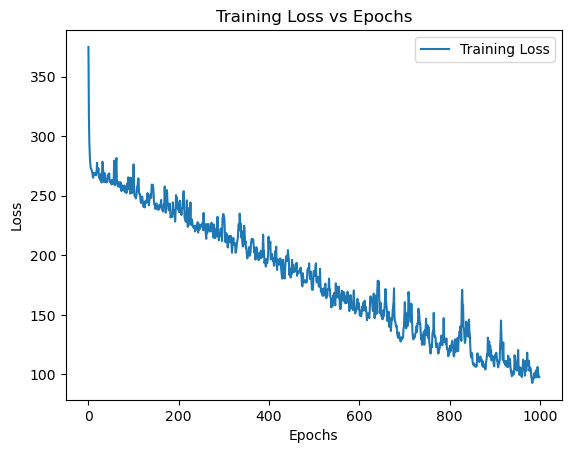

In [41]:
plt.plot(rnn.history['loss'], label='Training Loss')
plt.title('Training Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

46/46 [==============================] - 0s 2ms/step


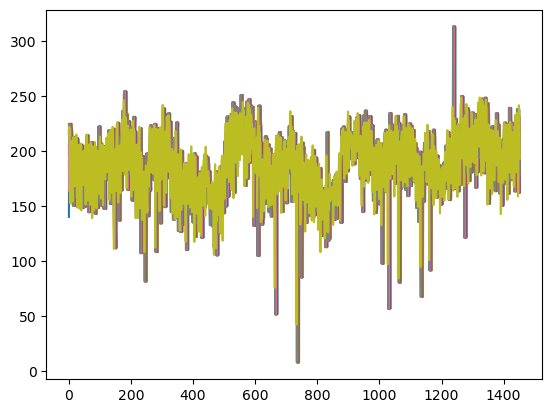

In [42]:
xw=[i for i in range(len(yw))]
yp=model_chena_shuffle.predict(yw)
plt.plot(xw,yw,xw,yp)

In [43]:
from keras.layers import Attention,MultiHeadAttention, Input, Dense, Flatten
from keras.models import Model

In [44]:
d=128
input=Input(name="activity",shape=(8,1))
attention, _ = MultiHeadAttention(num_heads=1,key_dim=d)(input, input, input,return_attention_scores=True)
hidden=Dense(d, activation='linear')(attention)
flatten=Flatten()(hidden)
output=Dense(1, activation='linear')(flatten)
model_att_chena=Model(inputs=input,outputs=output)
model_att_chena.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 activity (InputLayer)       [(None, 8, 1)]               0         []                            
                                                                                                  
 multi_head_attention (Mult  ((None, 8, 1),               897       ['activity[0][0]',            
 iHeadAttention)              (None, 1, 8, 8))                       'activity[0][0]',            
                                                                     'activity[0][0]']            
                                                                                                  
 dense_4 (Dense)             (None, 8, 128)               256       ['multi_head_attention[0][0]']
                                                                                              

In [45]:
tag="mhatt_chena"+datetime.now().strftime("%Y%m%d-%H%M%S")
log_dir = "logs/fit/" + tag
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
optimizer=Adam(learning_rate=1e-3)

model_att_chena.compile(optimizer="Adam", loss='mse', metrics=['mse','mae','mape'])
rnn = model_att_chena.fit(yw, yt, batch_size=256, epochs=200, shuffle=False, verbose=1,callbacks=[tensorboard_callback])
model_att_chena.save(log_dir+'/model_att_chena{0}.keras'.format(tag))

Epoch 1/200
6/6 [==============================] - 2s 29ms/step - loss: 31223.5293 - mse: 31223.5293 - mae: 174.3602 - mape: 91.0809
Epoch 2/200
6/6 [==============================] - 0s 29ms/step - loss: 11521.2725 - mse: 11521.2725 - mae: 101.3354 - mape: 53.2137
Epoch 3/200
6/6 [==============================] - 0s 26ms/step - loss: 2127.2166 - mse: 2127.2166 - mae: 37.1626 - mape: 22.2033
Epoch 4/200
6/6 [==============================] - 0s 27ms/step - loss: 3567.8201 - mse: 3567.8201 - mae: 52.4670 - mape: 31.8835
Epoch 5/200
6/6 [==============================] - 0s 34ms/step - loss: 906.9200 - mse: 906.9200 - mae: 24.0763 - mape: 14.6574
Epoch 6/200
6/6 [==============================] - 0s 26ms/step - loss: 1565.5703 - mse: 1565.5703 - mae: 35.0508 - mape: 19.1682
Epoch 7/200
6/6 [==============================] - 0s 27ms/step - loss: 770.9297 - mse: 770.9297 - mae: 22.3208 - mape: 13.5980
Epoch 8/200
6/6 [==============================] - 0s 25ms/step - loss: 840.3434 - mse: 

6/6 [==============================] - 0s 26ms/step - loss: 622.1313 - mse: 622.1313 - mae: 18.9609 - mape: 12.3850
Epoch 128/200
6/6 [==============================] - 0s 25ms/step - loss: 622.1275 - mse: 622.1275 - mae: 18.9607 - mape: 12.3850
Epoch 129/200
6/6 [==============================] - 0s 25ms/step - loss: 622.1238 - mse: 622.1238 - mae: 18.9606 - mape: 12.3850
Epoch 130/200
6/6 [==============================] - 0s 26ms/step - loss: 622.1201 - mse: 622.1201 - mae: 18.9605 - mape: 12.3849
Epoch 131/200
6/6 [==============================] - 0s 29ms/step - loss: 622.1163 - mse: 622.1163 - mae: 18.9603 - mape: 12.3849
Epoch 132/200
6/6 [==============================] - 0s 26ms/step - loss: 622.1125 - mse: 622.1125 - mae: 18.9602 - mape: 12.3849
Epoch 133/200
6/6 [==============================] - 0s 26ms/step - loss: 622.1088 - mse: 622.1088 - mae: 18.9601 - mape: 12.3848
Epoch 134/200
6/6 [==============================] - 0s 28ms/step - loss: 622.1049 - mse: 622.1049 - mae

### Mejor resultado
shuffle=False

rnn = model_att_chena.fit(yw, yt, batch_size=256, epochs=25, shuffle=False, verbose=1,callbacks=[tensorboard_callback])

Epoch 16/25

6/6 [==============================] - 0s 27ms/step - loss: 624.7125 - mse: 624.7125 - mae: 18.7557 - mape: 12.3557

46/46 [==============================] - 0s 2ms/step


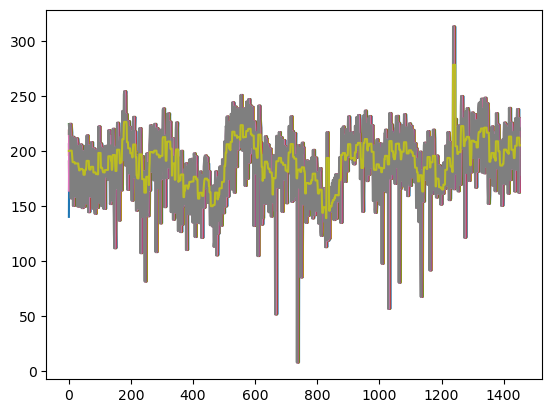

In [46]:
xw=[i for i in range(len(yw))]
yp=model_att_chena.predict(yw)
plt.plot(xw,yw,xw,yp)

In [47]:
d=128
input=Input(name="activity",shape=(8,1))
attention, _ = MultiHeadAttention(num_heads=1,key_dim=d)(input, input, input,return_attention_scores=True)
hidden=Dense(d, activation='linear')(attention)
flatten=Flatten()(hidden)
output=Dense(1, activation='linear')(flatten)
model_att_chena_shuffle=Model(inputs=input,outputs=output)
model_att_chena_shuffle.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 activity (InputLayer)       [(None, 8, 1)]               0         []                            
                                                                                                  
 multi_head_attention_1 (Mu  ((None, 8, 1),               897       ['activity[0][0]',            
 ltiHeadAttention)            (None, 1, 8, 8))                       'activity[0][0]',            
                                                                     'activity[0][0]']            
                                                                                                  
 dense_6 (Dense)             (None, 8, 128)               256       ['multi_head_attention_1[0][0]
                                                                    ']                      

In [48]:
tag="mhatt_chena"+datetime.now().strftime("%Y%m%d-%H%M%S")
log_dir = "logs/fit/" + tag
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
optimizer=Adam(learning_rate=1e-3)

model_att_chena_shuffle.compile(optimizer="Adam", loss='mse', metrics=['mse','mae','mape'])
rnn = model_att_chena_shuffle.fit(yw, yt, batch_size=256, epochs=200, shuffle=True, verbose=1,callbacks=[tensorboard_callback])
model_att_chena_shuffle.save(log_dir+'/model_att_chena{0}.keras'.format(tag))

Epoch 1/200
6/6 [==============================] - 2s 28ms/step - loss: 29698.6211 - mse: 29698.6211 - mae: 169.6091 - mape: 88.4002
Epoch 2/200
6/6 [==============================] - 0s 27ms/step - loss: 7701.5479 - mse: 7701.5479 - mae: 76.4556 - mape: 40.5416
Epoch 3/200
6/6 [==============================] - 0s 26ms/step - loss: 2976.0867 - mse: 2976.0867 - mae: 45.4011 - mape: 27.8297
Epoch 4/200
6/6 [==============================] - 0s 25ms/step - loss: 2034.4789 - mse: 2034.4789 - mae: 35.4024 - mape: 22.1204
Epoch 5/200
6/6 [==============================] - 0s 27ms/step - loss: 1163.6132 - mse: 1163.6132 - mae: 29.2517 - mape: 16.5344
Epoch 6/200
6/6 [==============================] - 0s 27ms/step - loss: 1273.9005 - mse: 1273.9005 - mae: 31.0256 - mape: 17.3636
Epoch 7/200
6/6 [==============================] - 0s 25ms/step - loss: 707.7598 - mse: 707.7598 - mae: 19.4625 - mape: 12.8484
Epoch 8/200
6/6 [==============================] - 0s 25ms/step - loss: 822.6853 - mse: 8

6/6 [==============================] - 0s 25ms/step - loss: 622.2997 - mse: 622.2997 - mae: 19.0435 - mape: 12.4065
Epoch 128/200
6/6 [==============================] - 0s 24ms/step - loss: 622.3763 - mse: 622.3763 - mae: 19.0543 - mape: 12.4067
Epoch 129/200
6/6 [==============================] - 0s 25ms/step - loss: 627.6356 - mse: 627.6356 - mae: 18.6063 - mape: 12.3439
Epoch 130/200
6/6 [==============================] - 0s 25ms/step - loss: 635.7501 - mse: 635.7501 - mae: 19.6007 - mape: 12.5653
Epoch 131/200
6/6 [==============================] - 0s 25ms/step - loss: 622.6609 - mse: 622.6609 - mae: 19.0142 - mape: 12.3945
Epoch 132/200
6/6 [==============================] - 0s 30ms/step - loss: 622.2403 - mse: 622.2403 - mae: 18.9693 - mape: 12.3846
Epoch 133/200
6/6 [==============================] - 0s 29ms/step - loss: 623.8124 - mse: 623.8124 - mae: 19.1047 - mape: 12.4194
Epoch 134/200
6/6 [==============================] - 0s 28ms/step - loss: 622.3320 - mse: 622.3320 - mae

#### Mejor resultado att chena shuffle 

Epoch 22/25
6/6 [==============================] - 0s 29ms/step - loss: 626.5667 - mse: 626.5667 - mae: 18.7741 - mape: 12.3667

46/46 [==============================] - 0s 3ms/step


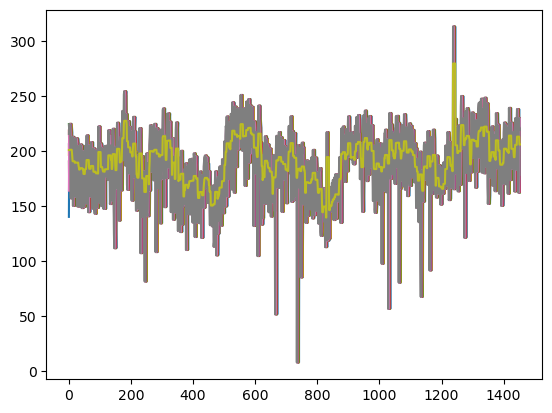

In [49]:
xw=[i for i in range(len(yw))]
yp=model_att_chena_shuffle.predict(yw)
plt.plot(xw,yw,xw,yp)

In [50]:
yw.shape

(1453, 8)

In [51]:
attention_output,attention_scores=model_att_chena.layers[1](yw[:1].reshape(1,8,1),
                yw[:1].reshape(1,8,1),
                yw[:1].reshape(1,8,1),
                return_attention_scores=True)

In [52]:
attention_scores.shape

TensorShape([1, 1, 8, 8])

In [53]:
attention_output.shape

TensorShape([1, 8, 1])

In [54]:
import seaborn as sb

In [55]:
timesteps = ["t"+str(i) for i in range(8)]
timesteps.reverse()

In [56]:
timesteps

['t7', 't6', 't5', 't4', 't3', 't2', 't1', 't0']

<Axes: >

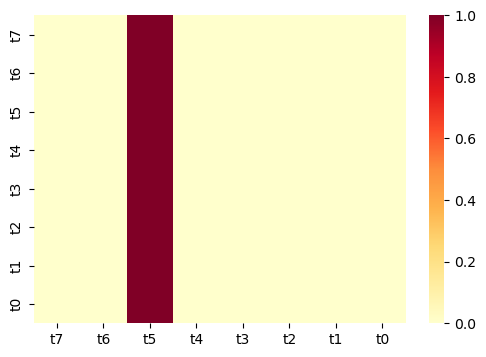

In [57]:
xticklb = timesteps
yticklb = timesteps
figure, axis = plt.subplots(1, 1)
figure.set_figheight(4)
figure.set_figwidth(6)
att=attention_scores[0,0,:,:]
sb.heatmap(att, xticklabels=xticklb, yticklabels=yticklb, cmap="YlOrRd",ax=axis)

In [58]:
W=model_att_chena.layers[1].get_weights()

In [59]:
len(W)

8

In [60]:
componentes=["query","query_bias","key","key_bias","value","value_bias",
             "projection","projection"]
for name, out in zip(componentes,W):
    print(name, out.shape)

query (1, 1, 128)
query_bias (1, 128)
key (1, 1, 128)
key_bias (1, 128)
value (1, 1, 128)
value_bias (1, 128)
projection (1, 128, 1)
projection (1,)


In [61]:
d=128
input=Input(name="activity",shape=(8,1))
q = Dense(name="wq",units=d)(input)
k = Dense(name="wk",units=d)(input)
v = Dense(name="wv",units=d)(input)
attention, _= Attention()([q, v, k],return_attention_scores=True)
hidden=Dense(d, activation='linear')(attention)
flatten=Flatten()(hidden)
output=Dense(1, activation='linear')(flatten)
model_att_chena_2=Model(inputs=input,outputs=output)
model_att_chena_2.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 activity (InputLayer)       [(None, 8, 1)]               0         []                            
                                                                                                  
 wq (Dense)                  (None, 8, 128)               256       ['activity[0][0]']            
                                                                                                  
 wv (Dense)                  (None, 8, 128)               256       ['activity[0][0]']            
                                                                                                  
 wk (Dense)                  (None, 8, 128)               256       ['activity[0][0]']            
                                                                                            

In [64]:
tag="att_chena_2_"+datetime.now().strftime("%Y%m%d-%H%M%S")
log_dir = "logs/fit/" + tag
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
optimizer=Adam(learning_rate=1e-3)

model_att_chena_2.compile(optimizer="Adam", loss='mse', metrics=['mse','mae','mape'])
rnn = model_att_chena_2.fit(yw, yt, batch_size=256, shuffle=True, epochs=50,verbose=1,callbacks=[tensorboard_callback])
model_att_chena_2.save(log_dir+'/model_att_chena_2_{0}.keras'.format(tag))

Epoch 1/50
6/6 [==============================] - 1s 21ms/step - loss: 1231.4617 - mse: 1231.4617 - mae: 28.5593 - mape: 17.1711
Epoch 2/50
6/6 [==============================] - 0s 22ms/step - loss: 830.3961 - mse: 830.3961 - mae: 21.0371 - mape: 13.8862
Epoch 3/50
6/6 [==============================] - 0s 22ms/step - loss: 703.5140 - mse: 703.5140 - mae: 21.2346 - mape: 13.1363
Epoch 4/50
6/6 [==============================] - 0s 21ms/step - loss: 666.1528 - mse: 666.1528 - mae: 18.8236 - mape: 12.6014
Epoch 5/50
6/6 [==============================] - 0s 22ms/step - loss: 644.4891 - mse: 644.4891 - mae: 19.9577 - mape: 12.6722
Epoch 6/50
6/6 [==============================] - 0s 21ms/step - loss: 639.6425 - mse: 639.6425 - mae: 18.6765 - mape: 12.4157
Epoch 7/50
6/6 [==============================] - 0s 22ms/step - loss: 627.4504 - mse: 627.4504 - mae: 19.3830 - mape: 12.4840
Epoch 8/50
6/6 [==============================] - 0s 21ms/step - loss: 622.7900 - mse: 622.7900 - mae: 18.949

Mejor resultado Chena attention
Shffle = True
rnn = model_att_chena_2.fit(yw, yt, batch_size=256, shuffle=True, epochs=50,verbose=1,callbacks=[tensorboard_callback])

Epoch 32/50
6/6 [==============================] - 0s 22ms/step - loss: 743.4833 - mse: 743.4833 - mae: 20.8123 - mape: 13.5831

46/46 [==============================] - 0s 2ms/step


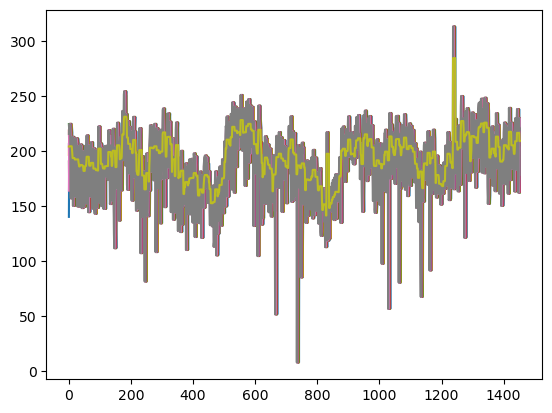

In [65]:
xw=[i for i in range(len(yw))]
yp=model_att_chena_2.predict(yw)
plt.plot(xw,yw,xw,yp)

In [66]:
attention_output,attention_scores=model_att_chena_2.layers[4]([yw[:1].reshape(1,8,1),
                yw[:1].reshape(1,8,1),
                yw[:1].reshape(1,8,1)],
                return_attention_scores=True)

<Axes: >

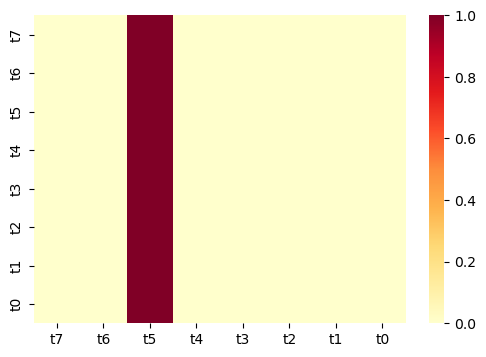

In [67]:
xticklb = timesteps
yticklb = timesteps
figure, axis = plt.subplots(1, 1)
figure.set_figheight(4)
figure.set_figwidth(6)
att=attention_scores[0,:,:]
sb.heatmap(att, xticklabels=xticklb, yticklabels=yticklb, cmap="YlOrRd",ax=axis)

In [68]:
attention_output.shape

TensorShape([1, 8, 1])

In [69]:
attention_scores.shape

TensorShape([1, 8, 8])

In [70]:
yw.shape

(1453, 8)

In [71]:
W=model_att_chena_2.layers[5].get_weights()
for i in range(len(W)):
    print(i,"=",W[i].shape)

0 = (128, 128)
1 = (128,)
